In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from sklearn.manifold import SpectralEmbedding

In [94]:
### Map representative ID to representative names

df = pd.read_csv('vote_data_117/h384.csv')
df.drop(0, inplace = True)
df['name'] = df['name'].str.removeprefix('Rep. ').str.replace(r' \[.*\]', '', regex = True)
colors = np.asarray(df['party'])
colors[colors == 'Republican'] = 'red'
colors[colors == 'Democrat'] = 'blue'
colors[(colors != 'red') & (colors != 'blue')] = 'gray'
colors = np.append(colors, 'blue')

In [95]:
adj_list = [[0 for i in range(435)] for j in range(435)]
for file in os.listdir('vote_data_117'):
    df = pd.read_csv('vote_data_117/' + file)

    y = df.index[df['vote'] == 'Yea'].tolist()
    n = df.index[df['vote'] == 'Nay'].tolist()

    for i in y:
        for j in y:
            if i == j:
                continue
            else:
                adj_list[i][j] += 1

    for i in n:
        for j in n:
            if i == j:
                continue
            else:
                adj_list[i][j] += 1

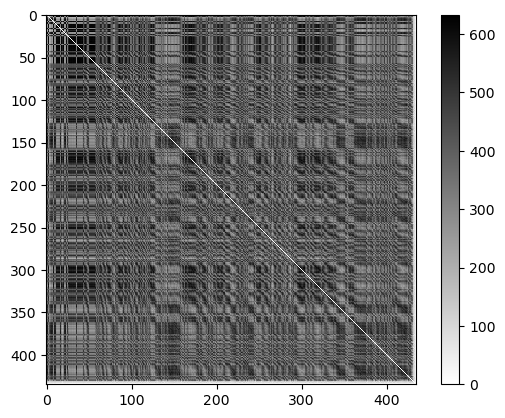

In [96]:
sparse_adj_list = scipy.sparse.csr_matrix(adj_list).todense()
plt.imshow(sparse_adj_list,interpolation='none',cmap='binary')
plt.colorbar()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, '117th Congress - House of Representatives Voting Patterns')

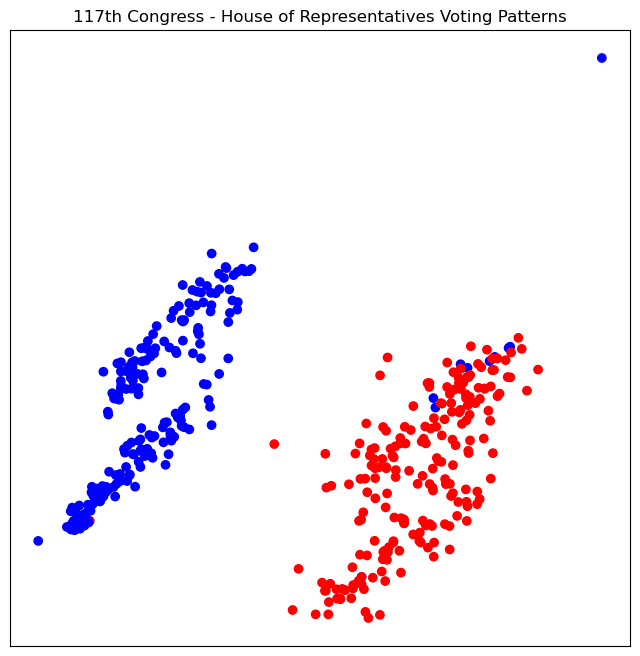

In [97]:
rep_embedding = SpectralEmbedding(affinity = 'precomputed').fit_transform(pd.DataFrame(adj_list))
plt.figure(figsize=(8, 8))
plt.scatter(rep_embedding[:, 0], rep_embedding[:, 1], c = colors)
plt.xticks([])
plt.yticks([])
plt.title('117th Congress - House of Representatives Voting Patterns')